In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import json
import re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

# Importing the Data <br>
The data is from https://www.kaggle.com/datasets/juhibhojani/airline-reviews/data <br>
The downloads are loaded here, simply change the path for access to whole code.


In [2]:
path = r"C:\\Users\\mraer\\Desktop\\UW\\Semester 3\\ML-2\\Project\\Classification- Tweets Data\\Airline_review.csv"

data = pd.read_csv(path)

# Data Preparation

## Data Check

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
data.head()
data.tail(50)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
23121,23121,ZIPAIR,1,"""can highly recommend ZIPAIR""",23rd July 2023,True,A great experience! Everything was easy. Trav...,NaN,Family Leisure,Economy Class,Narita to Seoul,July 2023,5.0,5.0,NaN,5.0,5.0,5.0,5.0,yes
23122,23122,ZIPAIR,8,"""a very pleasant experience""",21st July 2023,False,My first time flying Zip Air was a very plea...,Boeing787,Solo Leisure,Business Class,Tokyo to Bangkok,July 2023,5.0,5.0,5.0,5.0,NaN,5.0,5.0,yes
23123,23123,ZIPAIR,1,"""missed the ZIPAIR Tokyo flight""",18th July 2023,True,My Spirit Airlines flight from NY to Detroit...,NaN,Solo Leisure,Economy Class,Los Angeles to Tokyo,July 2023,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no
23124,23124,ZIPAIR,1,"""I was a couple minutes late""",5th July 2023,False,"I paid for three flights, but only flew once...",NaN,Business,Economy Class,Honolulu to Tokyo,April 2023,1.0,2.0,1.0,1.0,NaN,NaN,1.0,no
23125,23125,ZIPAIR,8,"""I’d highly recommend ZIPAIR""",14th June 2023,False,A small bottle of water is $2. Cup of coffee...,Boeing 787-8,Solo Leisure,Economy Class,San Jose to Tokyo,May 2023,5.0,5.0,2.0,5.0,1.0,1.0,5.0,yes
23126,23126,ZIPAIR,3,"""there is no free water""",13th June 2023,True,I asked the ground crew during check in if I...,NaN,Solo Leisure,Economy Class,Tokyo to Honolulu,June 2023,3.0,1.0,NaN,2.0,NaN,2.0,3.0,no
23127,23127,ZIPAIR,2,"""I was 5 mins late to check-in""",11th June 2023,True,The customer service is horrible. Any mistak...,NaN,Couple Leisure,Economy Class,Tokyo to Los Angeles,May 2023,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no
23128,23128,ZIPAIR,1,"""Nothing to complain about really""",22nd May 2023,False,"Nothing to complain about really, normal sea...",NaN,Couple Leisure,Economy Class,NaN,May 2023,5.0,5.0,5.0,5.0,3.0,3.0,5.0,yes
23129,23129,ZIPAIR,1,"""I heard back 3 months later""",18th May 2023,True,ZIPAIR completely broke my brand new luggage ...,NaN,Couple Leisure,Premium Economy,San Jose to Tokyo,March 2023,2.0,3.0,3.0,2.0,1.0,1.0,2.0,no
23130,23130,ZIPAIR,1,"""Horrible customer service""",13th May 2023,True,Horrible customer service. Bought the ticket...,NaN,Couple Leisure,Economy Class,Seuol to Tokyo,May 2023,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no


## Data Cleaning Process

### Checking Null values

Let's check for the NAs and we will only be working on verified reviews.


In [5]:
print("Checking the null data:\n", data.isnull().sum(),"\n\n_________________________________")

print("\nChecing the counts of the verified reviews:\n", data['Verified'].value_counts())

Checking the null data:
 Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64 

_________________________________

Checing the counts of the verified reviews:
 Verified
True     12322
False    10849
Name: count, dtype: int64


So there are 12322 verified reviews. <br>
We will only be choosing the columns and rows where the reviews are verified.
<br>
<br>
### Selecting verified reviews

In [6]:
data = data[data["Verified"]==True]

print(data.head(10))

    Unnamed: 0   Airline Name Overall_Rating  \
0            0    AB Aviation              9   
1            1    AB Aviation              1   
2            2    AB Aviation              1   
4            4  Adria Airways              1   
5            5  Adria Airways              1   
8            8  Adria Airways              1   
9            9  Adria Airways              8   
11          11  Adria Airways              1   
12          12  Adria Airways              2   
13          13  Adria Airways              2   

                             Review_Title          Review Date  Verified  \
0                 "pretty decent airline"   11th November 2019      True   
1                    "Not a good airline"       25th June 2019      True   
2          "flight was fortunately short"       25th June 2019      True   
4   "it ruined our last days of holidays"  24th September 2019      True   
5               "Had very bad experience"  17th September 2019      True   
8              

### Selecting required columns for model

In [7]:
df = data[["Airline Name", "Overall_Rating", "Review_Title", "Review", "Recommended"]]

print(df.head(10))

     Airline Name Overall_Rating                           Review_Title  \
0     AB Aviation              9                "pretty decent airline"   
1     AB Aviation              1                   "Not a good airline"   
2     AB Aviation              1         "flight was fortunately short"   
4   Adria Airways              1  "it ruined our last days of holidays"   
5   Adria Airways              1              "Had very bad experience"   
8   Adria Airways              1                 "combined two flights"   
9   Adria Airways              8                    "the crew was nice"   
11  Adria Airways              1                 "bad customer service"   
12  Adria Airways              2                    "overall very poor"   
13  Adria Airways              2                  "Would not fly again"   

                                               Review Recommended  
0     Moroni to Moheli. Turned out to be a pretty ...         yes  
1    Moroni to Anjouan. It is a very s

In [8]:
print(df.isnull().sum())

print("\n\n Checking datatype:\n", df.dtypes)

Airline Name      0
Overall_Rating    0
Review_Title      0
Review            0
Recommended       0
dtype: int64


 Checking datatype:
 Airline Name      object
Overall_Rating    object
Review_Title      object
Review            object
Recommended       object
dtype: object


### Checking for duplicates

In [9]:
duplicate = df[df.duplicated()] 
print(duplicate)

df = df.drop_duplicates()

      Airline Name Overall_Rating                        Review_Title  \
16641  Ravn Alaska              1               "give away your seat"   
16642  Ravn Alaska              1  "overall experience was fantastic"   
16644  Ravn Alaska              6        "delayed with no explanation   

                                                  Review Recommended  
16641    Anchorage to Kenai. They will give away your...          no  
16642    I flew on Ravn Alaska with my girlfriend bac...         yes  
16644    Anchorage to Homer. Last 4 times I have flow...          no  


## Vader Score 
<br>
This is a dictionary with already assigned weights for words. Here the text needs to be prepared like removal of punctuations, stop words, spaces which are unnecessary and then feed the data.

Preparing data for applying Vader scoring techniques. <br>


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
def clean_data(dataframe):

    # Removing special characters
    clean_text = re.sub(r"[^a-zA-Z0-9 \n\.]", " ", str(dataframe))

    # Removing single character with space
    clean_text = re.sub(r"\s+[a-zA-Z]\s+", " ", clean_text)

    # Removing single characters from the start
    clean_text = re.sub(r"\^[a-zA-Z]\s+", " ", clean_text)

    # Removing unncessary spaces
    clean_text = re.sub(r"\s+", " ", clean_text)

    # Removing unnecessary punctuations
    clean_text = re.sub(r"[^\w\s]", "", clean_text)

    # lowering the case of the text
    clean_text = clean_text.lower()

    #Tokenize
    token = word_tokenize(clean_text)

    #Stop word removal
    stop_word = set(stopwords.words("english"))

    filtered = [word for word in token if word.lower() not in stop_word]

    #joining the tokens
    cleaned_text =" ".join(filtered)

    
    # Display the cleaned DataFrame
    return cleaned_text

In [12]:
df_vader = df.copy() #Making a copy so df remains untouched

df_vader['Review'] = df['Review'].apply(clean_data)
df_vader['Review_Title'] = df['Review_Title'].apply(clean_data)

df_vader.head(20)

,Airline Name,Overall_Rating,Review_Title,Review,Recommended
0,AB Aviation,9,pretty decent airline,moroni moheli turned pretty decent airline onl...,yes
1,AB Aviation,1,good airline,moroni anjouan small airline ticket advised tu...,no
2,AB Aviation,1,flight fortunately short,anjouan dzaoudzi small airline airline based c...,no
4,Adria Airways,1,ruined last days holidays,book flight airline friend returned sofia amst...,no
5,Adria Airways,1,bad experience,bad experience rerouted cancelled flights last...,no
8,Adria Airways,1,combined two flights,worst airline ever combined two flights save c...,no
9,Adria Airways,8,crew nice,ljubljana munich homebase airport adria airway...,yes
11,Adria Airways,1,bad customer service,vienna sofia flight delayed 2 hours cabin crew...,no
12,Adria Airways,2,overall poor,traveling paris skopje may 4th via ljubljana f...,no
13,Adria Airways,2,would fly,ljubljana munich adria checkin system obviousl...,no


In [13]:
analyze = SentimentIntensityAnalyzer()

def Vader_score(text):
    sentiment_scores = analyze.polarity_scores(text)
    compound_scores = sentiment_scores['compound']
    
    if compound_scores >=0:
        return "Positive"
    else:
        return "Negative"


In [14]:
df['Vader_Review'] = df_vader['Review'].apply(Vader_score)
df['Vader_Review_Title'] = df_vader['Review_Title'].apply(Vader_score)

print(df.head(30))

        Airline Name Overall_Rating  \
0        AB Aviation              9   
1        AB Aviation              1   
2        AB Aviation              1   
4      Adria Airways              1   
5      Adria Airways              1   
8      Adria Airways              1   
9      Adria Airways              8   
11     Adria Airways              1   
12     Adria Airways              2   
13     Adria Airways              2   
14     Adria Airways              3   
15     Adria Airways              1   
16     Adria Airways              1   
17     Adria Airways              3   
18     Adria Airways              9   
94   Aegean Airlines              1   
95   Aegean Airlines              1   
96   Aegean Airlines              4   
97   Aegean Airlines              4   
101  Aegean Airlines              1   
102  Aegean Airlines              8   
103  Aegean Airlines              4   
105  Aegean Airlines              6   
106  Aegean Airlines              1   
107  Aegean Airlines     

**Review vs Title Missmatch check:** <br>

It is very common to have a different title of the review than the actual review. Our main focus will be ***Vader_Review*** but we also want to check ***Review Title*** is mismatching than the review

In [15]:
total = sum(1 for char1, char2 in zip(df['Vader_Review'], df['Vader_Review_Title']) if char1 == char2)

print(total)
print(len(df))

print("Review vs Review title match:", (total/len(df))*100,"%")

8645
12319
Review vs Review title match: 70.17615066157967 %


# Explorytary Data Analysis

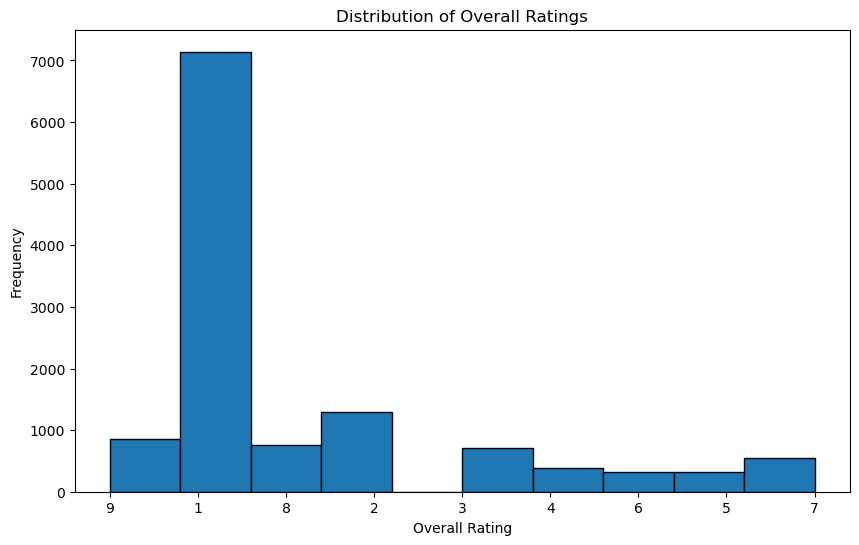

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df["Overall_Rating"], bins=10, edgecolor='black')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.savefig("OverAll rating Distribution.jpg", dpi=500)
plt.show()

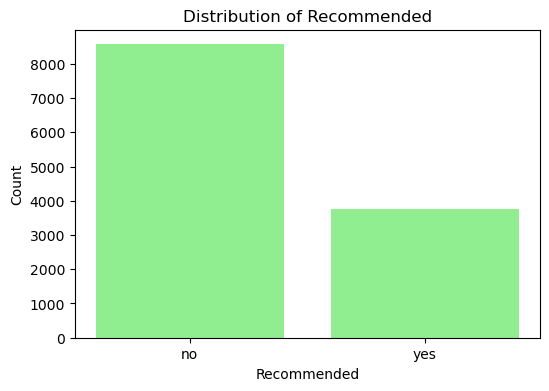

In [17]:
plt.figure(figsize=(6, 4))
plt.bar(df["Recommended"].value_counts().index, df["Recommended"].value_counts(), color='lightgreen')
plt.title("Distribution of Recommended")
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.savefig("Recommended Airlines.jpg", dpi=500)
plt.show()

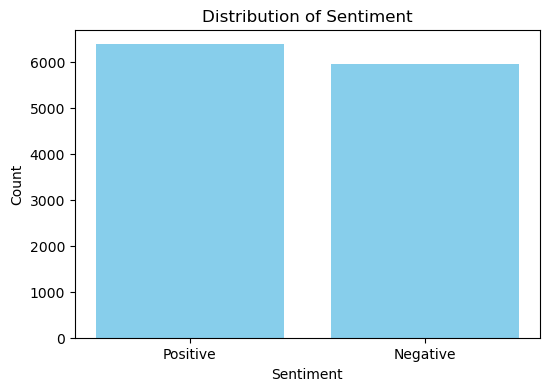

In [18]:
plt.figure(figsize=(6, 4))
plt.bar(df["Vader_Review"].value_counts().index, df["Vader_Review"].value_counts(), color='skyblue')
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("Sentiment on Airlines.jpg", dpi=500)
plt.show()

 ## TF-IDF Scoring 
<br>
As the computer would not understand the textual data, the Reviews cannot be used as simple english language. Thus we need to convert the reviews. Here TF-IDF Vectorizer will be vectorizing the reviews into simple vectors of numbers based on the frequency of unique occurences. This will be the explanatory variable for classification. In here we will be using the "clean" reviews after removing the stop words and preprocessing it as unclean data will affect the tf-idf scoring.

In [19]:
data_tfidf = pd.DataFrame()

data_tfidf['Reviews'] = df_vader['Review'] 
data_tfidf['Sentiment'] = df['Vader_Review']

data_tfidf.head(10)

,Reviews,Sentiment
0,moroni moheli turned pretty decent airline onl...,Positive
1,moroni anjouan small airline ticket advised tu...,Negative
2,anjouan dzaoudzi small airline airline based c...,Positive
4,book flight airline friend returned sofia amst...,Positive
5,bad experience rerouted cancelled flights last...,Negative
8,worst airline ever combined two flights save c...,Positive
9,ljubljana munich homebase airport adria airway...,Positive
11,vienna sofia flight delayed 2 hours cabin crew...,Negative
12,traveling paris skopje may 4th via ljubljana f...,Negative
13,ljubljana munich adria checkin system obviousl...,Positive


In [20]:
X = data_tfidf['Reviews']
Y = data_tfidf['Sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=30)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idfVec = TfidfVectorizer(max_features=6000, norm='l1')

X_train_final = tf_idfVec.fit_transform(X_train) #vectorizers learn the vocabulary and computes IDF values 
X_test_final = tf_idfVec.transform(X_test) # same vectorizers use the vocabulary and IDF values learnt before

In [147]:
print(X_test_final)

  (0, 5944)	0.023264592459746623
  (0, 5936)	0.03455096338928444
  (0, 5748)	0.024182449327665285
  (0, 5282)	0.030951476731083765
  (0, 4841)	0.060021721320878914
  (0, 4704)	0.0378158765883942
  (0, 3858)	0.04240013919756893
  (0, 3688)	0.03248701393648104
  (0, 3571)	0.020532261887573823
  (0, 3504)	0.04205113330487499
  (0, 3303)	0.04727311838224107
  (0, 3195)	0.033486620611964425
  (0, 3128)	0.03810098739940726
  (0, 2899)	0.08726618556219265
  (0, 2830)	0.03431605203438449
  (0, 2609)	0.032466624858627585
  (0, 2246)	0.040920746908603534
  (0, 2229)	0.020353749490537115
  (0, 2216)	0.020621840092006186
  (0, 2209)	0.02853515802995478
  (0, 1994)	0.02473048584787543
  (0, 1944)	0.027469691702913687
  (0, 1471)	0.020864086419883993
  (0, 1113)	0.033793588921318285
  (0, 969)	0.02274063802551013
  :	:
  (3695, 2105)	0.013256927240350191
  (3695, 1994)	0.00998267994327049
  (3695, 1989)	0.015610616587441175
  (3695, 1910)	0.014261190630752468
  (3695, 1772)	0.016892671615230333
  (3

### One-Hot Encoding
<br>
As the target variable is categorical, we move ahead to encode it to categories.

In [22]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Y_train = label.fit_transform(Y_train)
Y_test = label.transform(Y_test)

Y_train

array([1, 0, 1, ..., 1, 1, 0])

# Classification Tasks

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

### Function Definition

**AUC Curve Plot**

In [24]:
def plot_roc(model, X_test, Y_test, model_name):
    y_scores = model.predict_proba(X_test)
    roc = RocCurveDisplay.from_estimator(model, X_test, Y_test)
    roc.figure_.suptitle("Roc curve")
    model_name = str(model_name)
    file_name = f'ROC_{model_name}.jpg'
    plt.savefig(file_name, dpi=500)
    plt.show()
    

**Confusion Matrix Plot**

In [25]:

def cnf_matrix(model, X_test, Y_test, color, model_name):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap=color)
    model_name = str(model_name)
    file_name = f'ConfusionMatrix_{model_name}.jpg'
    plt.savefig(file_name, dpi=500)
    plt.show()

## Logistic Regression Classifier

In [29]:
clf = LogisticRegression()
clf.fit(X_train_final, Y_train)

# predictions on testing data
Y_pred = clf.predict(X_test_final)
Y_prob = clf.predict_proba(X_test_final)[:, 1]


# accuracy calculation
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# precision, recall, and F1-score for multiclass classification
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(Y_test, Y_pred))

Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1779
           1       0.80      0.76      0.78      1917

    accuracy                           0.78      3696
   macro avg       0.78      0.78      0.78      3696
weighted avg       0.78      0.78      0.78      3696



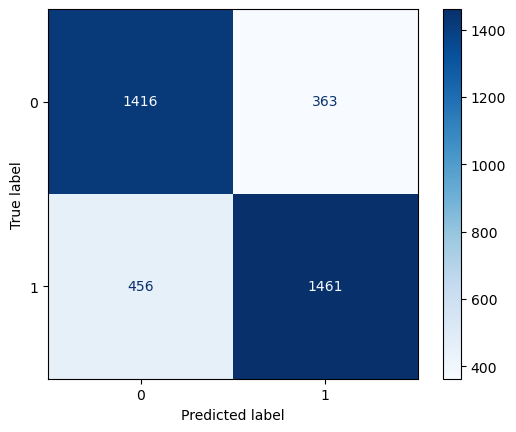

In [27]:
cnf_matrix(clf, X_test_final, Y_test,'Blues', 'LogisticRegression')

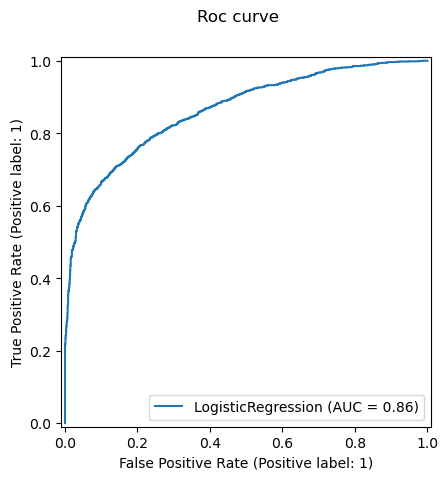

In [38]:

plot_roc(clf, X_test_final, Y_test, 'LogisticRegression')

In [30]:
auc = roc_auc_score(Y_test, Y_prob)
print(f'AUC: {auc:.2f}')

AUC: 0.86


## Decision Tree Classifier

In [39]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_final, Y_train)


dt_pred = dt.predict(X_test_final)
dt_prob = dt.predict_proba(X_test_final)[:,1]

accuracy = accuracy_score(Y_test, dt_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(Y_test, dt_pred, average='weighted')
recall = recall_score(Y_test, dt_pred, average='weighted')
f1 = f1_score(Y_test, dt_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(Y_test, dt_pred))

Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1779
           1       0.73      0.74      0.73      1917

    accuracy                           0.72      3696
   macro avg       0.72      0.72      0.72      3696
weighted avg       0.72      0.72      0.72      3696



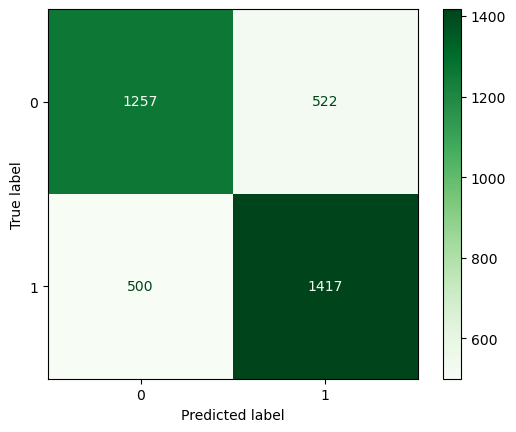

In [32]:
cnf_matrix(dt, X_test_final, Y_test,'Greens', 'DecisionTree')

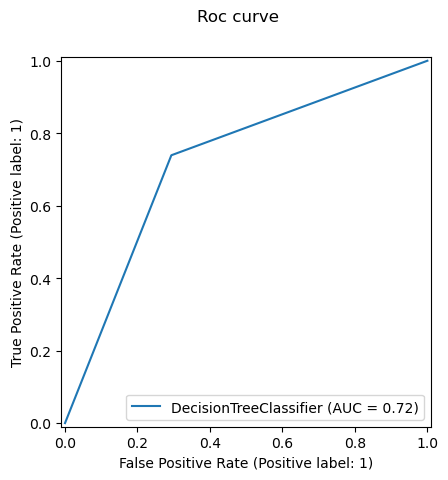

In [33]:
plot_roc(dt, X_test_final, Y_test, 'DecisionTree')

In [34]:
auc = roc_auc_score(Y_test, dt_prob)
print(f'AUC: {auc:.2f}')

AUC: 0.72


## Random Forest

In [40]:
rn = RandomForestClassifier(random_state=1)
rn.fit(X_train_final, Y_train)


rn_pred = rn.predict(X_test_final)
rn_prob = rn.predict_proba(X_test_final)[:,1]

accuracy = accuracy_score(Y_test, rn_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(Y_test, rn_pred, average='weighted')
recall = recall_score(Y_test, rn_pred, average='weighted')
f1 = f1_score(Y_test, rn_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(Y_test, rn_pred))

Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1 Score: 0.80
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1779
           1       0.85      0.75      0.80      1917

    accuracy                           0.80      3696
   macro avg       0.81      0.81      0.80      3696
weighted avg       0.81      0.80      0.80      3696



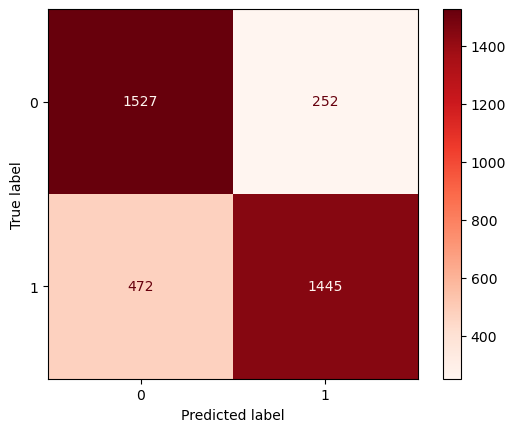

In [36]:
cnf_matrix(rn, X_test_final, Y_test,'Reds', 'Random Forest')

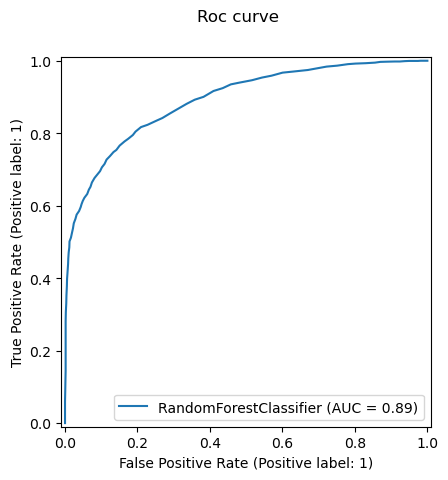

In [37]:
plot_roc(rn, X_test_final, Y_test, 'Random Forest')

In [224]:
auc = roc_auc_score(Y_test, rn_prob)
print(f'AUC: {auc:.2f}') 

AUC: 0.89
